# Outdated code for the model

### Retrieve and format the data

#### Retrieve 3 replicate datasets. [Datasets link](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE97290)

In [ ]:
%%time

! prefetch GSE97290

#### Unpack the data (convert .sra to .fastq)

In [ ]:
%%time
%%bash

fastq-dump SRR5399542/SRR5399542.sra --outdir SRR5399542 --split-files

head -n 5 SRR5399542/SRR5399542.fastq

In [ ]:
%%time
%%bash

fastq-dump SRR5399543/SRR5399543.sra --outdir SRR5399543 --split-files

head -n 5 SRR5399543/SRR5399543.fastq

In [ ]:
%%time
%%bash

fastq-dump SRR5399544/SRR5399544.sra --outdir SRR5399544 --split-files

head -n 5 SRR5399544/SRR5399544.fastq

#### Retrieve occupancy

In [16]:
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2561nnn/GSM2561057/suppl/GSM2561057%5FOccupancy%5FH3%5FCC%5Frep%5F1%2Ebw -O SRR5399542/occupancy.bw

--2024-06-28 10:08:18--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2561nnn/GSM2561057/suppl/GSM2561057%5FOccupancy%5FH3%5FCC%5Frep%5F1%2Ebw
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.10, 2607:f220:41e:250::11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18156484 (17M)
Saving to: ‘SRR5399542/occupancy.bw’

SRR5399542/occupanc 100%[===================>]  17.31M  5.09MB/s    in 6.9s    

2024-06-28 10:08:26 (2.49 MB/s) - ‘SRR5399542/occupancy.bw’ saved [18156484/18156484]



In [17]:
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2561nnn/GSM2561058/suppl/GSM2561058%5FOccupancy%5FH3%5FCC%5Frep%5F2%2Ebw -O SRR5399543/occupancy.bw

--2024-06-28 10:08:27--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2561nnn/GSM2561058/suppl/GSM2561058%5FOccupancy%5FH3%5FCC%5Frep%5F2%2Ebw
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.10, 2607:f220:41e:250::7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16331976 (16M)
Saving to: ‘SRR5399543/occupancy.bw’

SRR5399543/occupanc 100%[===================>]  15.58M  3.86MB/s    in 5.6s    

2024-06-28 10:08:33 (2.78 MB/s) - ‘SRR5399543/occupancy.bw’ saved [16331976/16331976]



In [18]:
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2561nnn/GSM2561059/suppl/GSM2561059%5FOccupancy%5FH3%5FCC%5Frep%5F3%2Ebw -O SRR5399544/occupancy.bw

--2024-06-28 10:08:35--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2561nnn/GSM2561059/suppl/GSM2561059%5FOccupancy%5FH3%5FCC%5Frep%5F3%2Ebw
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.10, 2607:f220:41e:250::11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13771320 (13M)
Saving to: ‘SRR5399544/occupancy.bw’

SRR5399544/occupanc 100%[===================>]  13.13M  5.71MB/s    in 2.3s    

2024-06-28 10:08:38 (5.71 MB/s) - ‘SRR5399544/occupancy.bw’ saved [13771320/13771320]



### Map the reads

#### Build an index for an aligner and move output files into a dedicated folder

In [ ]:
%%time
%%bash

bowtie2-build \
reference_genome.fasta.gz \
index \
--threads 96 \ # Set your own number of threads
--quiet

mkdir -p index
mv index.* index

#### Map the reads to the reference genome

In [ ]:
%%time

! bowtie2 \
--index index/index \
-1 SRR5399542/SRR5399542_1.fastq \
-2 SRR5399542/SRR5399542_2.fastq \
-S SRR5399542/SRR5399542.sam \
-X 1000 \
--very-sensitive \
--threads 96 # Set your own number of threads

In [ ]:
%%time

! bowtie2 \
--index index/index \
-1 SRR5399543/SRR5399543_1.fastq \
-2 SRR5399543/SRR5399543_2.fastq \
-S SRR5399543/SRR5399543.sam \
-X 1000 \
--very-sensitive \
--threads 96 # Set your own number of threads

In [ ]:
%%time

! bowtie2 \
--index index/index \
-1 SRR5399544/SRR5399544_1.fastq \
-2 SRR5399544/SRR5399544_2.fastq \
-S SRR5399544/SRR5399544.sam \
-X 1000 \
--very-sensitive \
--threads 96 # Set your own number of threads

#### Filter the reads to be paired, mapped in propper pair, mate reverse strand and first in pair (SAM flag 99)

In [ ]:
%%time

! samtools view \
-h \
-f 99 \
SRR5399542/SRR5399542.sam > SRR5399542/SRR5399542_99.sam \
--threads 96 # Set your own number of threads

In [ ]:
%%time

! samtools view \
-h \
-f 99 \
SRR5399543/SRR5399543.sam > SRR5399543/SRR5399543_99.sam \
--threads 96 # Set your own number of threads

In [ ]:
%%time

! samtools view \
-h \
-f 99 \
SRR5399544/SRR5399544.sam > SRR5399544/SRR5399544_99.sam \
--threads 96 # Set your own number of threads

#### Filter the reads to be paired, mapped in propper pair, read reverse strand and second in pair (SAM flag 147)

In [ ]:
%%time

! samtools view \
-h \
-f 147 \
SRR5399542/SRR5399542.sam > SRR5399542/SRR5399542_147.sam \
--threads 96 # Set your own number of threads

In [ ]:
%%time

! samtools view \
-h \
-f 147 \
SRR5399543/SRR5399543.sam > SRR5399543/SRR5399543_147.sam \
--threads 96 # Set your own number of threads

In [ ]:
%%time

! samtools view \
-h \
-f 147 \
SRR5399544/SRR5399544.sam > SRR5399544/SRR5399544_147.sam \
--threads 96 # Set your own number of threads

#### Merge files with SAM flags 99 and 147 to get a file with filtered reads

In [ ]:
%%time

! samtools merge \
SRR5399542/SRR5399542_147.sam SRR5399542/SRR5399542_99.sam \
-o SRR5399542/SRR5399542_filtered.sam \
--threads 96 # Set your own number of threads

In [ ]:
%%time

! samtools merge \
SRR5399543/SRR5399543_147.sam SRR5399543/SRR5399543_99.sam \
-o SRR5399543/SRR5399543_filtered.sam \
-f \
--threads 96 # Set your own number of threads

In [ ]:
%%time

! samtools merge \
SRR5399544/SRR5399544_147.sam SRR5399544/SRR5399544_99.sam \
-o SRR5399544/SRR5399544_filtered.sam \
--threads 96 # Set your own number of threads

### Analyse the data

#### Load the SAM files

In [5]:
%%time

chemical_sam_1 = pd.read_csv(
    "SRR5399542/SRR5399542_filtered.sam",
    sep="\t",
    comment="@",
    names=["qid", "rid", "pos", "mapq", "tlen", "seq"],
    usecols=[0, 2, 3, 4, 8, 9],
)

# chemical_sam_1 = chemical_sam_1.drop(index=chemical_sam_1.query('rid == "NC_001148.4"').index)

chemical_sam_1.info

CPU times: user 47.9 s, sys: 6.22 s, total: 54.1 s
Wall time: 55.9 s


<bound method DataFrame.info of                           qid          rid     pos  mapq  tlen  \
0                SRR5399542.1  NC_001146.8  333248    42    73   
1                SRR5399542.4  NC_001146.8  245286    42    92   
2                SRR5399542.1  NC_001146.8  333297    42   -73   
3                SRR5399542.4  NC_001146.8  245354    42   -92   
4                SRR5399542.5  NC_001224.1   69007    32   102   
...                       ...          ...     ...   ...   ...   
38590235  SRR5399542.41984342  NC_001139.9  815103     1   -73   
38590236  SRR5399542.41984343  NC_001139.9  825567    42   -95   
38590237  SRR5399542.41984346  NC_001144.5  463414     1  -107   
38590238  SRR5399542.41984349  NC_001147.6  662187    42   -76   
38590239  SRR5399542.41984352  NC_001148.4  134331    42   -69   

                               seq  
0         CAACTTCAATACCAGCAGCAGCAA  
1         CGGTANGTCTAGGAGCCACTTGCC  
2         TGCAAATACAACAACAACAACAGC  
3         CACGCAGGCCTTACAAT

In [8]:
%%time

chemical_sam_2 = pd.read_csv(
    "SRR5399543/SRR5399543_filtered.sam",
    sep="\t",
    header=None,
    comment="@",
    names=["qid", "rid", "pos", "mapq", "tlen", "seq"],
    usecols=[0, 2, 3, 4, 8, 9],
)

# chemical_sam_2 = chemical_sam_2.drop(index=chemical_sam_2.query('rid == "NC_001148.4"').index)

chemical_sam_2.info

CPU times: user 5.53 s, sys: 476 ms, total: 6 s
Wall time: 6.42 s


<bound method DataFrame.info of                          qid           rid     pos  mapq  tlen  \
0              SRR5399543.10   NC_001224.1   70837    42    58   
1              SRR5399543.12  NC_001136.10  312258    42    51   
2              SRR5399543.15   NC_001148.4  291462    42    52   
3              SRR5399543.16   NC_001140.6  115847    42    49   
4              SRR5399543.36   NC_001148.4   81957    42    51   
...                      ...           ...     ...   ...   ...   
3685539  SRR5399543.10873679  NC_001136.10  893613    42   -57   
3685540  SRR5399543.10873715   NC_001137.3   84082    42   -52   
3685541  SRR5399543.10873722   NC_001139.9   76332    42   -68   
3685542  SRR5399543.10873724   NC_001139.9  382153    42   -57   
3685543  SRR5399543.10873725   NC_001146.8  403492    42   -55   

                                                       seq  
0        NTGTTGGTAGTTGGAGTTGAGCTGTAAACTCAATGACTTAGGTCTTCAT  
1        NTCCATCTGCTGCGTAGGCAGCATTTAACTCATTAGAATTACCG

In [7]:
%%time

chemical_sam_3 = pd.read_csv(
    "SRR5399544/SRR5399544_filtered.sam",
    sep="\t",
    header=None,
    comment="@",
    names=["qid", "rid", "pos", "mapq", "tlen", "seq"],
    usecols=[0, 2, 3, 4, 8, 9],
)

# chemical_sam_3 = chemical_sam_3.drop(index=chemical_sam_3.query('rid == "NC_001148.4"').index)

chemical_sam_3.info

CPU times: user 1min 9s, sys: 8.43 s, total: 1min 18s
Wall time: 1min 22s


<bound method DataFrame.info of                           qid          rid     pos  mapq  tlen  \
0                SRR5399544.2  NC_001144.5  803765    42    51   
1                SRR5399544.3  NC_001137.3  554378    42    93   
2                SRR5399544.6  NC_001139.9  796889    42   304   
3                SRR5399544.2  NC_001144.5  803792    42   -51   
4                SRR5399544.3  NC_001137.3  554447    42   -93   
...                       ...          ...     ...   ...   ...   
55295531  SRR5399544.66525606  NC_001144.5  453489     1  -224   
55295532  SRR5399544.66525610  NC_001148.4  268641    42  -186   
55295533  SRR5399544.66525612  NC_001143.9  470148    42  -112   
55295534  SRR5399544.66525613  NC_001144.5  630567    42  -104   
55295535  SRR5399544.66525649  NC_001148.4  621304    23  -136   

                               seq  
0         NGAGTGTTGGAGGAGGAGGAGGAG  
1         TCTCTCACTGAAAAGTAATGAAAA  
2         AGCTTAATATGATTAAAATCTGTA  
3         ATGGTACTGACGTTGCA

#### Look at the read length distribution

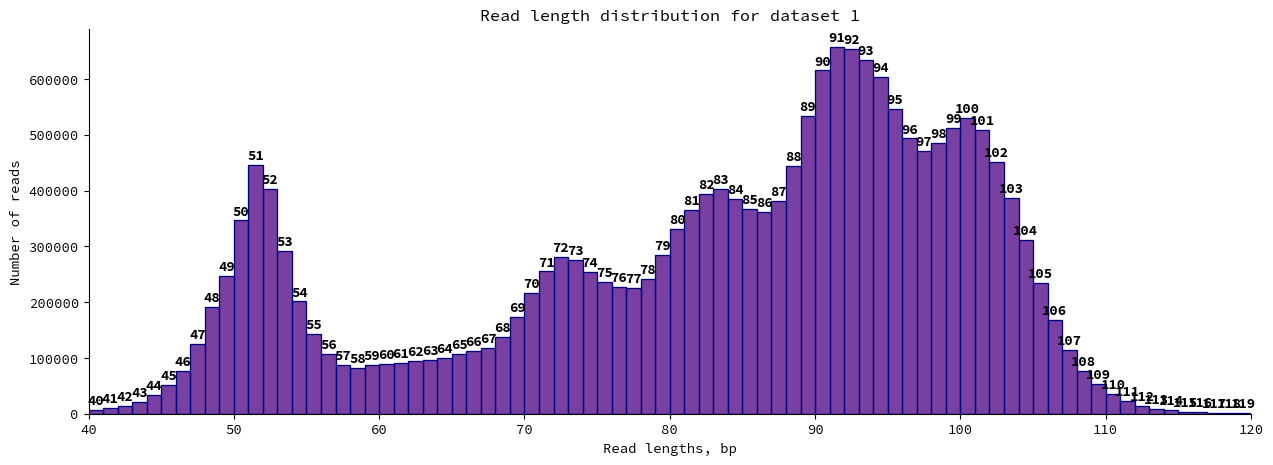

In [300]:
plt.figure(figsize=(15, 5))

left_bound, right_bound = 40, 120
data = abs(
    chemical_sam_1.tlen[
        (chemical_sam_1.tlen >= left_bound) & (chemical_sam_1.tlen <= right_bound+1)
    ]
)

ax = sns.histplot(
    data,
    binwidth=1,
    color='indigo',
    edgecolor='navy'
)

plt.title('Read length distribution for chemical cleavage dataset 1')
plt.xlabel('Read lengths, bp')
plt.ylabel('Number of reads')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(left_bound, right_bound)

rects = ax.patches
x_pos = [int(rect.get_x()) for rect in rects]
y_pos = [int(rect.get_height()) for rect in rects]
for i, (x, y) in enumerate(zip(x_pos, y_pos)):
    if i < len(rects)-1:
        plt.text(
            x+0.5,
            y+10000,
            x,
            ha='center',
            weight='bold'
        )

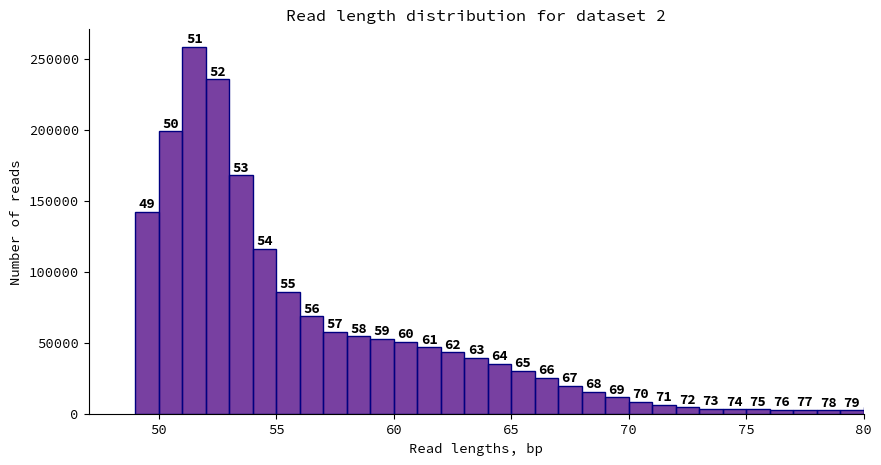

In [298]:
plt.figure(figsize=(10, 5))

left_bound, right_bound = 47, 80
data = abs(
    chemical_sam_2.tlen[
        (chemical_sam_2.tlen >= left_bound) & (chemical_sam_2.tlen <= right_bound+1)
    ]
)

ax = sns.histplot(
    data,
    binwidth=1,
    color='indigo',
    edgecolor='navy'
)

plt.title('Read length distribution for chemical cleavage dataset 2')
plt.xlabel('Read lengths, bp')
plt.ylabel('Number of reads')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(left_bound, right_bound)

rects = ax.patches
x_pos = [int(rect.get_x()) for rect in rects]
y_pos = [int(rect.get_height()) for rect in rects]
for i, (x, y) in enumerate(zip(x_pos, y_pos)):
    if i < len(rects)-1:
        plt.text(
            x+0.5,
            y+3000,
            x,
            ha='center',
            weight='bold'
        )

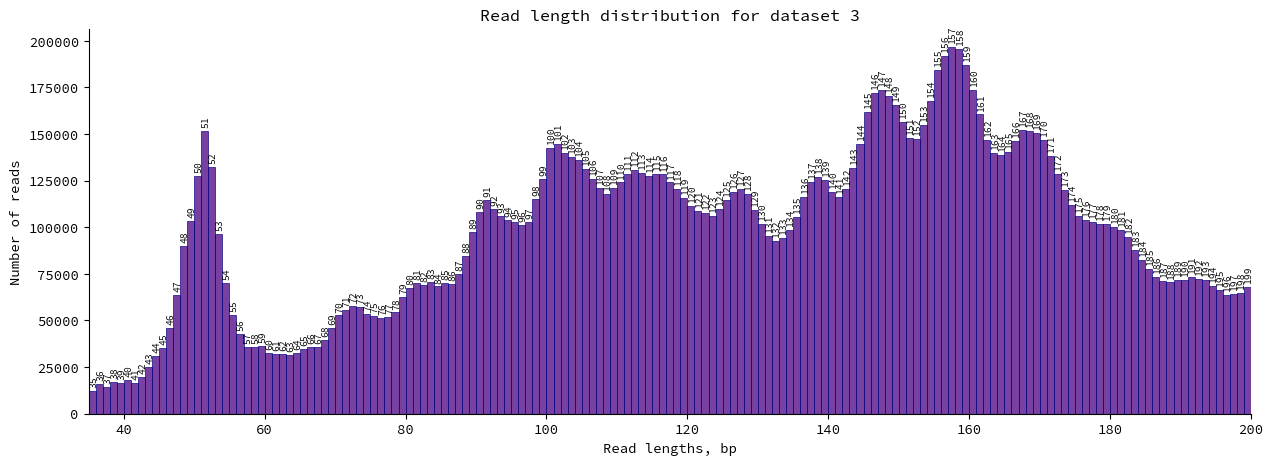

In [297]:
plt.figure(figsize=(15, 5))

left_bound, right_bound = 35, 200
data = abs(
    chemical_sam_3.tlen[
        (chemical_sam_3.tlen >= left_bound) & (chemical_sam_3.tlen <= right_bound+1)
    ]
)

ax = sns.histplot(
    data,
    binwidth=1,
    color='indigo',
    edgecolor='navy'
)

plt.title('Read length distribution for chemical cleavage dataset 3')
plt.xlabel('Read lengths, bp')
plt.ylabel('Number of reads')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(left_bound, right_bound)

rects = ax.patches
x_pos = [int(rect.get_x()) for rect in rects]
y_pos = [int(rect.get_height()) for rect in rects]
for i, (x, y) in enumerate(zip(x_pos, y_pos)):
    if i < len(rects)-1:
        plt.text(
            x+0.7,
            y+3000,
            x,
            ha='center',
            rotation=90,
            fontsize=7
        )